In [21]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np

In [48]:
ss = pd.read_json("/data/dzeiberg/mave_calibration/processed_datasets/BAP1_SGE_pipeline_C.json")
tauP = np.load("/data/dzeiberg/mave_calibration/figs_10_09_24/BAP1_SGE_pipeline_C/Tau_p.npy")
tauB = np.load("/data/dzeiberg/mave_calibration/figs_10_09_24/BAP1_SGE_pipeline_C/Tau_b.npy")
is_inverted = np.load("/data/dzeiberg/mave_calibration/figs_10_09_24/BAP1_SGE_pipeline_C/is_inverted.npy")

In [49]:
is_inverted

array(False)

In [26]:
tauP

array([-0.03573259, -0.03593572, -0.03634198, -0.0368498 , -0.03766231,
       -0.03969359,         nan,         nan])

In [41]:
tauB

array([-0.02395115, -0.02364645, -0.0232402 , -0.02273238, -0.02191986,
       -0.02059953, -0.0175526 , -0.00648211])

In [38]:
ss[ss.functional_classification == "unchanged"].scores.apply(np.mean).min()

np.float64(-0.1204582)

In [39]:
ss[ss.functional_classification == "depleted"].scores.apply(np.mean).max()

np.float64(-0.006860068)

In [37]:
ss[ss.functional_classification == "enriched"].scores.apply(np.mean).min()

np.float64(0.00599691)

<Axes: >

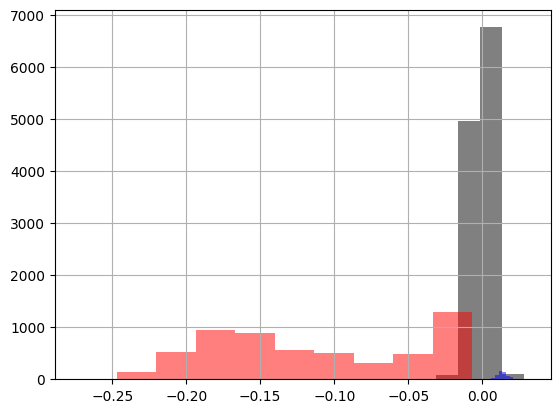

In [31]:
ss[ss.functional_classification == "unchanged"].scores.apply(np.mean).hist(color='gray')
ss[ss.functional_classification == "depleted"].scores.apply(np.mean).hist(alpha=.5,color='red')
ss[ss.functional_classification == "enriched"].scores.apply(np.mean).hist(alpha=.5,color='blue')

<Axes: >

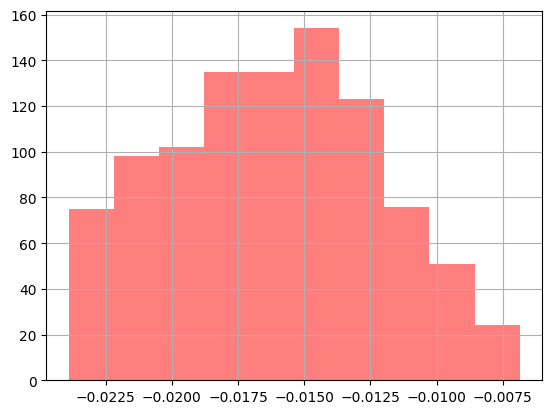

In [45]:
ss[(ss.functional_classification == "depleted") &\
    (ss.scores.apply(np.mean) > tauB.min())].scores.apply(np.mean).hist(alpha=.5,color='red')

In [47]:
ss.clinvar_clinical_significance.value_counts()

clinvar_clinical_significance
Uncertain significance                          1025
Likely benign                                    810
Pathogenic                                       140
Conflicting interpretations of pathogenicity     112
Likely pathogenic                                 52
Benign/Likely benign                              35
Pathogenic/Likely pathogenic                       7
Benign                                             6
Name: count, dtype: int64